In [3]:
import pandas as pd

import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [4]:

df = pd.read_csv('Iris.csv')

In [5]:
df = df.drop(columns='Id')

explorando os dados

In [6]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

vizualizando os dados

In [9]:
sns.set_theme(style='ticks')

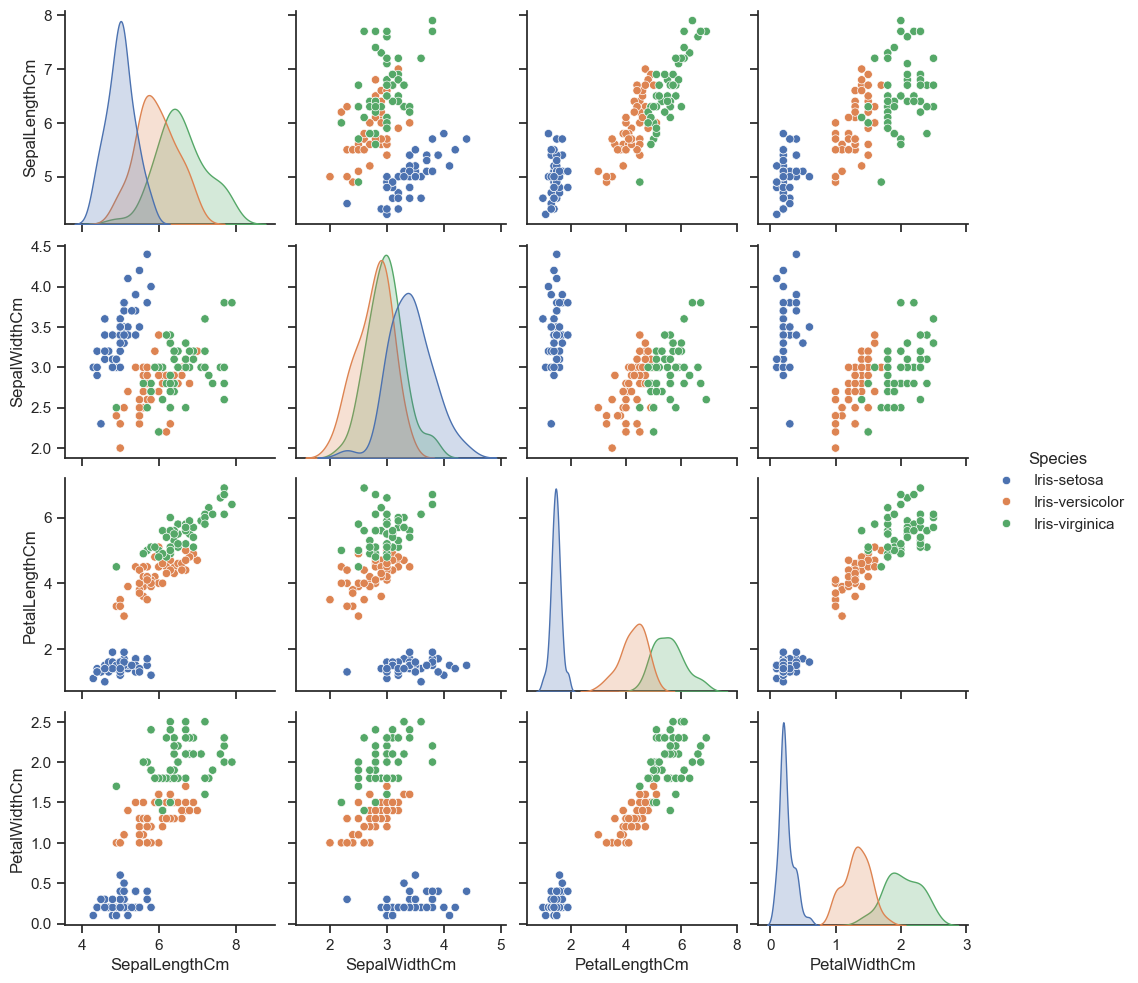

In [11]:
sns.pairplot(df, hue="Species")

- separando o dataset entre treino e teste

In [13]:
X, y = df.iloc[:,0:4], df.iloc[:, 4]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.33)

preparando os modelos

In [72]:
model_gaus = GaussianNB()
modelo_logistic = LogisticRegression(solver='saga')
model_tree = DecisionTreeClassifier()

In [73]:
y_logistc = modelo_logistic.fit(X_train, y_train)
y_gaus = model_gaus.fit(X_train, y_train)
y_tree = model_tree.fit(X_train, y_train)

c:\Users\USUARIO\Documents\Programação\Aprendizado Analise de dados\house-prices-advanced-regression-techniques\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [74]:
resultado = y_gaus.predict(X_test)
resultado_logistic = y_logistc.predict(X_test)
resultado_tree = y_tree.predict(X_test)

In [76]:
confusion_matrix(y_test, resultado_logistic)

array([[19,  0,  0],
       [ 0, 13,  2],
       [ 0,  0, 16]])

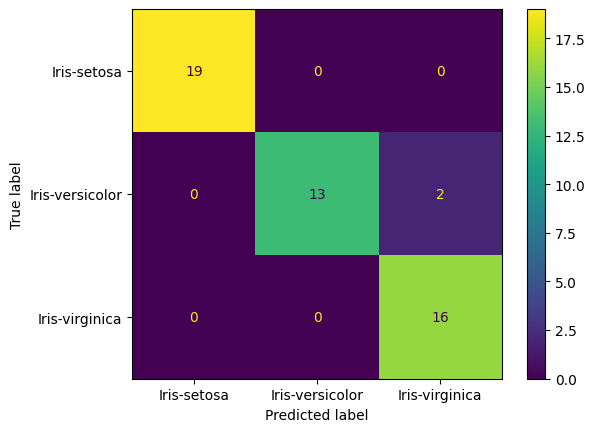

In [67]:
_ = ConfusionMatrixDisplay.from_estimator(y_logistc, X_test, y_test)

In [68]:
accuracy_score(y_test, resultado_logistic)

0.96